### Multiple Linear Regression in Python 


In [4]:
import pandas as pd 
df= pd.read_csv('archive\insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


#### Convertiendo las columnas en categorias y codificandolas con valores enteros

In [7]:
df['sex']=df['sex'].astype('category') # define la columna como categoria/define the column as a category 
df['sex']=df['sex'].cat.codes # codifica la columna, asignando valores numericos iguales para cada uno de los elementos que comparte misma categoria/Encode the column, assigning the same numeric values to elements that share the same category.

df['smoker']=df['smoker'].astype('category') # define la columna como categoria/define the column as a category 
df['smoker']=df['smoker'].cat.codes # codifica la columna, asignando valores numericos iguales para cada uno de los elementos que comparte misma categoria/Encode the column, assigning the same numeric values to elements that share the same category.

df['region']=df['region'].astype('category') # define la columna como categoria/define the column as a category 
df['region']=df['region'].cat.codes # codifica la columna, asignando valores numericos iguales para cada uno de los elementos que comparte misma categoria/Encode the column, assigning the same numeric values to elements that share the same category.

df


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


#### verificando que existan valores nulos en el dataframe

In [8]:
df.isnull().sum() # verificando cuantos valores son nulos en el CSV

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#### dividimos el dataframe en variables independiente y dependientes

In [14]:
x=df.drop(columns='expenses') # corresponde a las variables independientes 
y=df['expenses'] # corresponde a la variable dependiente 

#### Dividimos los datos en dos conjuntos  uno de entrenamiento y otro de testeo

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

##### Importamos el modelo y lo entrenamos 

In [33]:
from sklearn.linear_model import LinearRegression 
lr =LinearRegression()
lr.fit(X_train,y_train) 


LinearRegression()

#### calculando los valores del vector de coeficiente y el valor de la intercecion

In [34]:
c=lr.intercept_
print(c)
m=lr.coef_
print(m)

-11827.690243440864
[  256.54688301   -49.5556959    329.03829593   479.33098055
 23399.22241438  -276.24306229]


In [35]:
y_pred_train =lr.predict(X_train)
print(y_pred_train)
print(y_pred_train.shape)


[ 2069.03359585  8141.36511348 18755.9087006   7870.74055918
  6319.77323677  2023.31256548 26863.42450343 14926.51215619
 10495.85929889 16242.86056466 11725.99370507 11281.93339827
 39310.00037015  5826.58193988 12319.08622599  3157.93965299
 15407.40958383  4638.61198466  5019.75698033  6017.49314695
 15364.9402173   8973.68891998  8767.32720772 34224.46402602
  6693.75646855 26942.08473102 27280.87272357 15486.58742309
  8811.58410991 34400.26712291 10167.16501979  3890.92199565
 15617.85872463 29573.33802913 29452.02427532 28118.40509054
 10015.30321546 33055.63888237  3963.91622151 25447.54101793
  5661.55997897 27993.48459099  7049.83736756 15106.48019776
  2569.47001823 35456.58856451 15254.19868735  3190.8761776
  1785.54434704 10139.73090613  9948.63660039 11220.24742389
 16775.5017179   4325.19567694  1904.54981552  4172.84106372
  5601.06217858  6195.52970579 26784.60441869 14128.61380525
 11874.02084386  7810.43798357 14045.14759283  2749.88604757
 13235.0604046  11774.943

Text(0, 0.5, 'Predicted Charges')

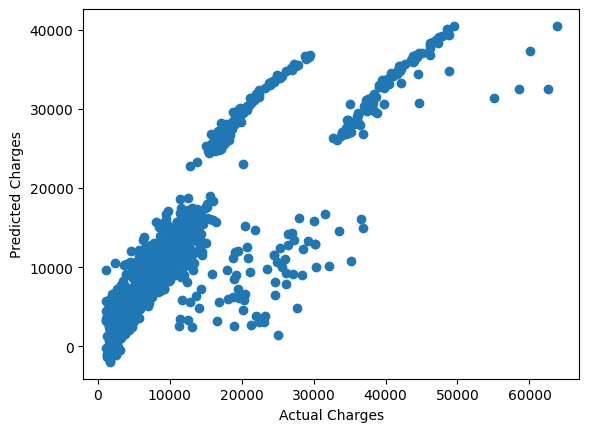

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

In [37]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)
y_pred_test =lr.predict(X_test)

Text(0, 0.5, 'Predicted Charges')

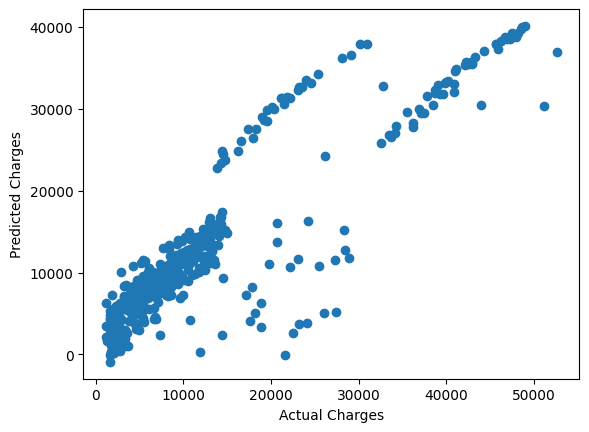

In [38]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

In [39]:
r2_score(y_test,y_pred_test)

0.791151983192236